In [2]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns; sns.set()

#zad1

In [3]:
df = pd.read_csv('PAD_09_PD.csv', sep=';')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [5]:
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']
male.head(), female.head()

(   Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0    Male   19                  15                      39
 1    Male   21                  15                      81
 8    Male   64                  19                       3
 10   Male   67                  19                      14
 14   Male   37                  20                      13,
    Gender  Age  Annual Income (k$)  Spending Score (1-100)
 2  Female   20                  16                       6
 3  Female   23                  16                      77
 4  Female   31                  17                      40
 5  Female   22                  17                      76
 6  Female   35                  18                       6)

In [6]:
male_mean_income = male['Annual Income (k$)'].mean()
female_mean_income = female['Annual Income (k$)'].mean()
male_mean_income, female_mean_income

(62.22727272727273, 59.25)

In [7]:
male_std_income = male['Annual Income (k$)'].std()
female_std_income = female['Annual Income (k$)'].std()
male_std_income, female_std_income

(26.63837318249413, 26.01195151505595)

In [8]:
t = male_mean_income - female_mean_income
t = t / np.sqrt((male_std_income**2)/len(male) + (female_std_income**2)/len(female))
t

0.7927442280257677

In [9]:
stats.t.sf(abs(t), df=len(male))*2

0.4300589288693557

wieksze od alfa=0.05, wiec nie mozemy  odrzucic hipotezy zerowej

In [10]:
stats.ttest_ind(male['Annual Income (k$)'], female['Annual Income (k$)'])

Ttest_indResult(statistic=0.795022298602198, pvalue=0.42755249399927864)

# zad2

In [11]:
df1 = df.rename({'Annual Income (k$)':'income'}, axis=1)
df1 = df1.rename({'Spending Score (1-100)':'spending_score',
'Gender':'gender', 'Age':'age'}, axis=1)
df1.head()

,gender,age,income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df1 = df1.rename({'gender':'is_male'}, axis=1)
df1['is_male'] = df1['is_male'].map(lambda x: 1 if x == 'Male' else 0)
df1.head()

,is_male,age,income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<AxesSubplot:>

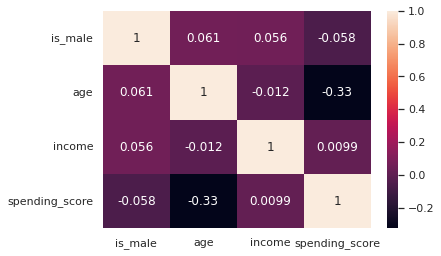

In [14]:
sns.heatmap(df1.corr(), annot=True)  # brak duzych korelacji

In [19]:
model = smf.ols(formula='spending_score ~ is_male + age+ income', data=df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         spending_score   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Thu, 26 May 2022   Prob (F-statistic):           4.91e-05
Time:                        21:28:01   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.9300      6.642     11.130      0.000      60.831      87.029
is_male       -2.0132      3.512     -0.573      0.567      -8.939       4.913
age           -0.6004      0.125     -4.806      0.000      -0.847      -0.354
income         0.0079      0.066      0.119      0.905      -0.123       0.139
==============================================================================
Omnibus:                       11.059   Durbin-Watson:                   3.448
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.033
Skew:                          -0.233   Prob(JB):                       0.0490
Kurtosis:                       2.288   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model = smf.ols(formula='spending_score ~ is_male + age', data=df1)
result = model.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.099    
Dependent Variable: spending_score   AIC:                1850.1080
Date:               2022-05-26 21:30 BIC:                1860.0029
No. Observations:   200              Log-Likelihood:     -922.05  
Df Model:           2                F-statistic:        11.99    
Df Residuals:       197              Prob (F-statistic): 1.22e-05 
R-squared:          0.109            Scale:              600.51   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      74.4089    5.2812  14.0893  0.0000  63.9939  84.8239
is_male        -1.9892    3.4973  -0.5688  0.5701  -8.8861   4.9077
age            -0.6006    0.1246  -4.8208  0.0000  -0.8463  -0.3549
------------------------------------------------------------------
Omnibus:              10.935        Durbin-Watson:           3.447
Prob(Omnibus):        0.004         Jarque-Bera (JB):        5.938
Skew:                 -0.227        Prob(JB):                0.051
Kurtosis:             2.289         Condition No.:           128  
==================================================================

"""